# Proyecto Nº2 Accidentes Aereos

## Analisis exploratiorio de los datos (EDA)
Intentaré abordar el dataset en cuestion para encontrar si es que hay: outliers, duplicados, valores faltantes y gráficos pertinentes con el tipo de variable (cualitativa/cuantitativa) demostrando que se comprende la diferencia entre ambas.

Ademas, cada gráfico estára acompañado de análisis profundos y conclusiones acordes


## Contexto
 Los accidentes aéreos son eventos inesperados e indeseados que involucran aeronaves y se producen daños físicos a personas o a la propia aeronave. Un accidente aéreo puede involucrar cualquier tipo de aeronave, incluyendo aviones comerciales, aviones privados, helicópteros, planeadores y globos aerostáticos.

Los accidentes aéreos pueden ser causados por diversos factores, como errores humanos, fallos de equipos, problemas meteorológicos, problemas de mantenimiento, fallas en la gestión del tráfico aéreo, problemas de diseño o problemas de fabricación. Y en cuanto a sus consecuencias, pueden ser tanto en términos de pérdidas humanas como económicas.

Para este proyecto se intentara abordar un analisis exploratorio el cual nos pueda dar unos insights interezantes para luego pasarlo a un dashboard el cual se mostrara en una exposicion 1 a 1

Para este trabajo realice previamente arreglos a mi dataframe para simplemente poderlo trabajar de una manera mas sencilla y practica, que no preste lugar a la confucion al exponerlo despues

### Cargamos las librerias

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings #ignore de warnings
from wordcloud import WordCloud
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

## Cargamos la data

In [7]:
df = pd.read_csv('AccidentesAviones2.csv')
df.dtypes

date                      object
declared_time             object
route                     object
operator                  object
flight_number             object
flight_type               object
aircraft_type             object
registration              object
cn_ln                     object
total_onboard            float64
passengers_onboard       float64
crew_onboard             float64
total_fatalities         float64
passengers_fatalities    float64
crew_fatalities          float64
ground                   float64
summary                   object
country                   object
dtype: object

### Chequeo por filas duplicadas

In [9]:
duplicate_count = df.duplicated().sum()
print("Number of duplicates:", duplicate_count)

Number of duplicates: 0


0 duplicados, perfecto

In [10]:
df.columns

Index(['date', 'declared_time', 'route', 'operator', 'flight_number',
       'flight_type', 'aircraft_type', 'registration', 'cn_ln',
       'total_onboard', 'passengers_onboard', 'crew_onboard',
       'total_fatalities', 'passengers_fatalities', 'crew_fatalities',
       'ground', 'summary'],
      dtype='object')

### Verifico la info de mi dataframe

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   5008 non-null   object 
 1   declared_time          3499 non-null   object 
 2   route                  5003 non-null   object 
 3   operator               4998 non-null   object 
 4   flight_number          1326 non-null   object 
 5   flight_type            4245 non-null   object 
 6   aircraft_type          4995 non-null   object 
 7   registration           4736 non-null   object 
 8   cn_ln                  4341 non-null   object 
 9   total_onboard          4991 non-null   float64
 10  passengers_onboard     4787 non-null   float64
 11  crew_onboard           4789 non-null   float64
 12  total_fatalities       5000 non-null   float64
 13  passengers_fatalities  4773 non-null   float64
 14  crew_fatalities        4773 non-null   float64
 15  grou

In [12]:
df.dtypes

date                      object
declared_time             object
route                     object
operator                  object
flight_number             object
flight_type               object
aircraft_type             object
registration              object
cn_ln                     object
total_onboard            float64
passengers_onboard       float64
crew_onboard             float64
total_fatalities         float64
passengers_fatalities    float64
crew_fatalities          float64
ground                   float64
summary                   object
dtype: object

In [13]:
df.isnull().any()

date                     False
declared_time             True
route                     True
operator                  True
flight_number             True
flight_type               True
aircraft_type             True
registration              True
cn_ln                     True
total_onboard             True
passengers_onboard        True
crew_onboard              True
total_fatalities          True
passengers_fatalities     True
crew_fatalities           True
ground                    True
summary                   True
dtype: bool

mucha de la info de mi dataset simplemente se desconcoce, asi que es las filas hay informacion al azar faltante, yo eleji transformarla en NaN o NaT respectivamente asi poder trabajar con formulas y operaciones matematicas de igual manera

### Paneo numerico para resaltar valores numericos atipicos o extraños

In [14]:
df.describe()

,total_onboard,passengers_onboard,crew_onboard,total_fatalities,passengers_fatalities,crew_fatalities,ground
count,4991.000000,4787.000000,4789.000000,5000.000000,4773.000000,4773.000000,4964.000000
mean,31.121218,26.877376,4.519524,22.294000,18.940708,3.587262,1.718372
std,45.479965,44.035342,3.758072,35.000385,34.065190,3.177315,55.495544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,7.000000,3.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2750.000000


Podemos verlo a travez de una matriz de correlacion, para ver de manera sencilla que tipo de relaciones hay entre mis columnas numericas

<Axes: >

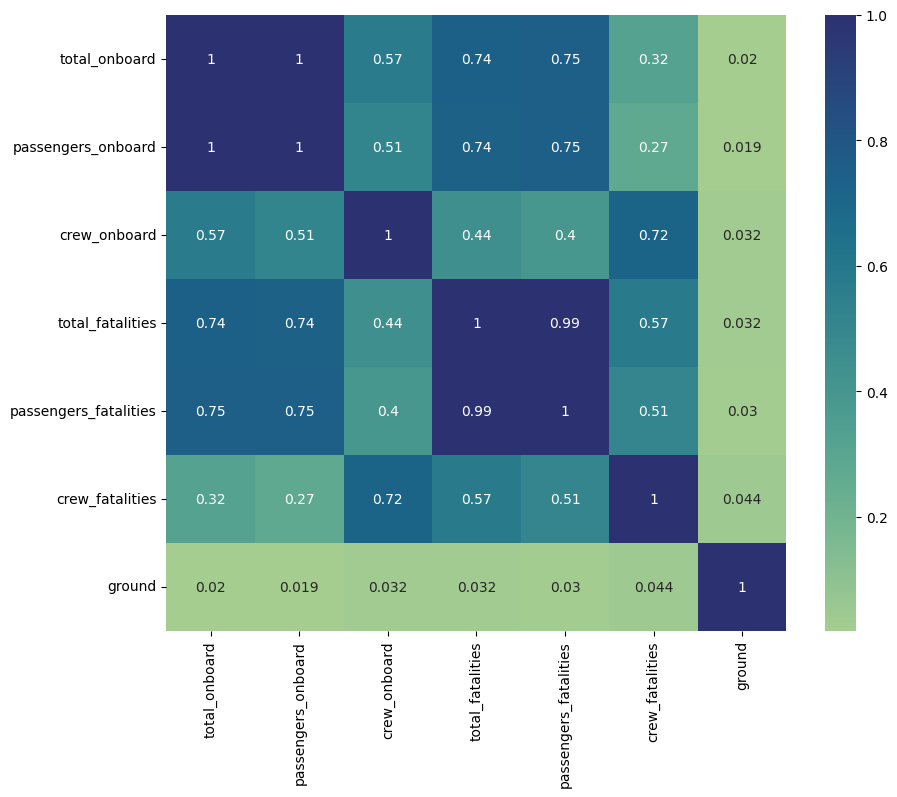

In [15]:
#Creamos una matriz de correlación
df_num = df[['total_onboard','passengers_onboard','crew_onboard','total_fatalities','passengers_fatalities','crew_fatalities','ground']]
corr_matrix = df_num.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='crest')

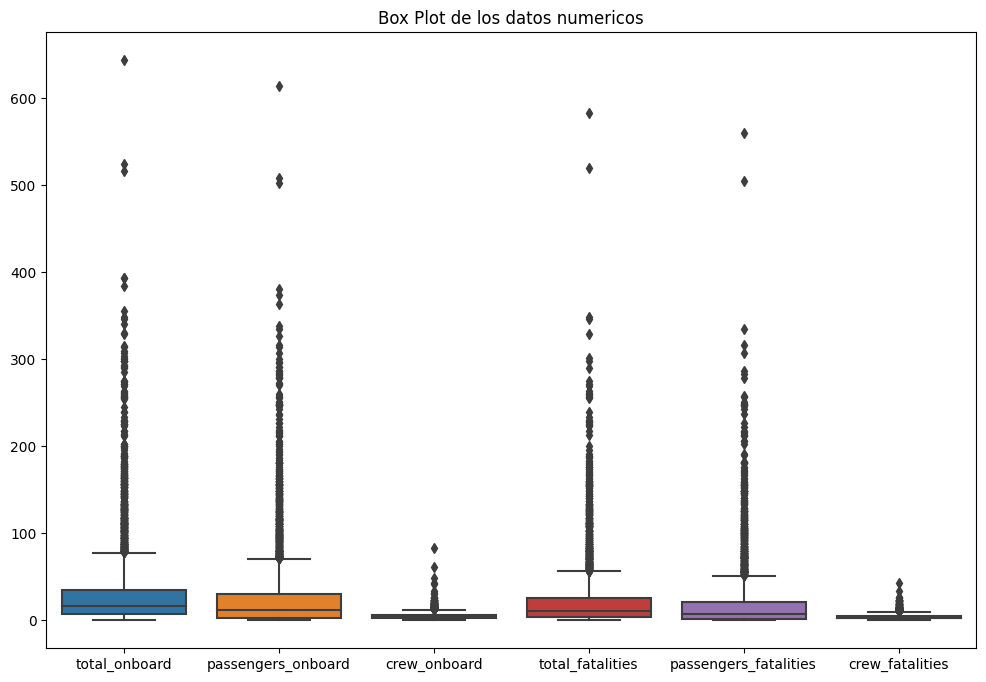

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df[['total_onboard', 'passengers_onboard', 'crew_onboard', 'total_fatalities', 'passengers_fatalities', 'crew_fatalities']])
plt.title('Box Plot de los datos numericos')
plt.show()

In [16]:
df.columns

Index(['date', 'declared_time', 'route', 'operator', 'flight_number',
       'flight_type', 'aircraft_type', 'registration', 'cn_ln',
       'total_onboard', 'passengers_onboard', 'crew_onboard',
       'total_fatalities', 'passengers_fatalities', 'crew_fatalities',
       'ground', 'summary'],
      dtype='object')

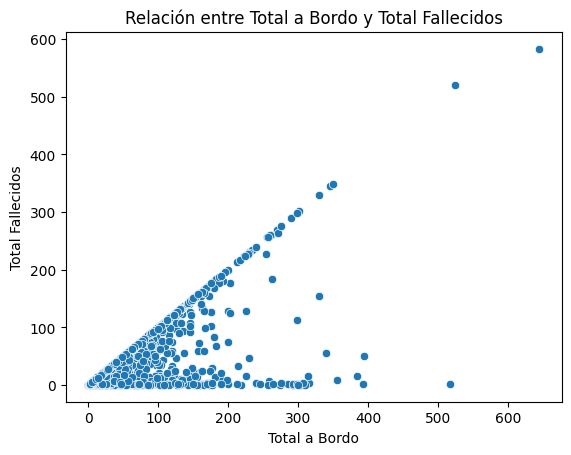

In [17]:
# Gráfico de dispersión
sns.scatterplot(x= 'total_onboard', y='total_fatalities', data=df)
plt.xlabel('Total a Bordo')
plt.ylabel('Total Fallecidos')
plt.title('Relación entre Total a Bordo y Total Fallecidos')
plt.show()

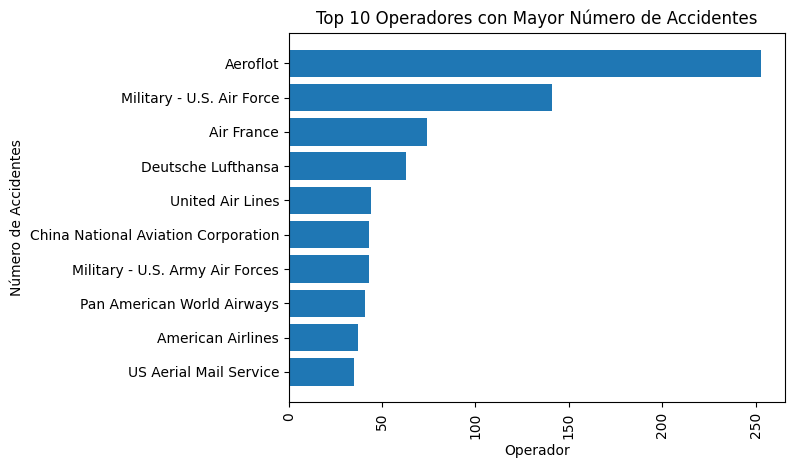

In [18]:
operador_counts = df['operator'].value_counts().nlargest(10).sort_values(ascending=True)
plt.barh(operador_counts.index, operador_counts.values)
plt.xlabel('Operador')
plt.ylabel('Número de Accidentes')
plt.title('Top 10 Operadores con Mayor Número de Accidentes')
plt.xticks(rotation=90)
plt.show()

KPI tripulation fatalities = 
   VAR TotalFatalidades = SUM('AccidentesAviones2'[crew_fatalities])
   VAR TotalAccidentes = COUNTROWS('AccidentesAviones2')
   RETURNKPI tripulation fatalities =  
   VAR TotalFatalidades = SUM('AccidentesAviones2'[crew_fatalities]) 
   VAR TotalAccidentes = COUNTROWS('AccidentesAviones2') 
   RETURN 
   DIVIDE(TotalFatalidades, TotalAccidentes) * 100 
   DIVIDE(TotalFatalidades, TotalAccidentes)

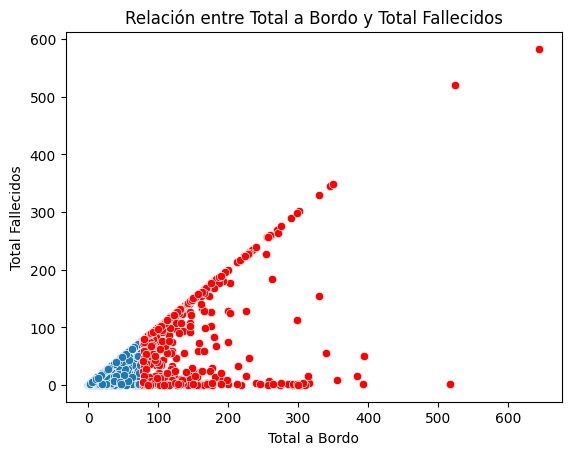

In [20]:
# Calcular el promedio y el rango intercuartílico (IQR)
mean = df['total_onboard'].mean()
iqr = df['total_onboard'].quantile(0.75) - df['total_onboard'].quantile(0.25)

# Calcular los límites superiores e inferiores para los outliers
upper_limit = df['total_onboard'].quantile(0.75) + (1.5 * iqr)
lower_limit = df['total_onboard'].quantile(0.25) - (1.5 * iqr)

# Crear un nuevo dataframe solo con los outliers
outliers_df = df[(df['total_onboard'] > upper_limit) | (df['total_onboard'] < lower_limit)]

# Graficar el scatter plot con los outliers resaltados
sns.scatterplot(x='total_onboard', y='total_fatalities', data=df)
sns.scatterplot(x='total_onboard', y='total_fatalities', data=outliers_df, color='red')
plt.xlabel('Total a Bordo')
plt.ylabel('Total Fallecidos')
plt.title('Relación entre Total a Bordo y Total Fallecidos')
plt.show()

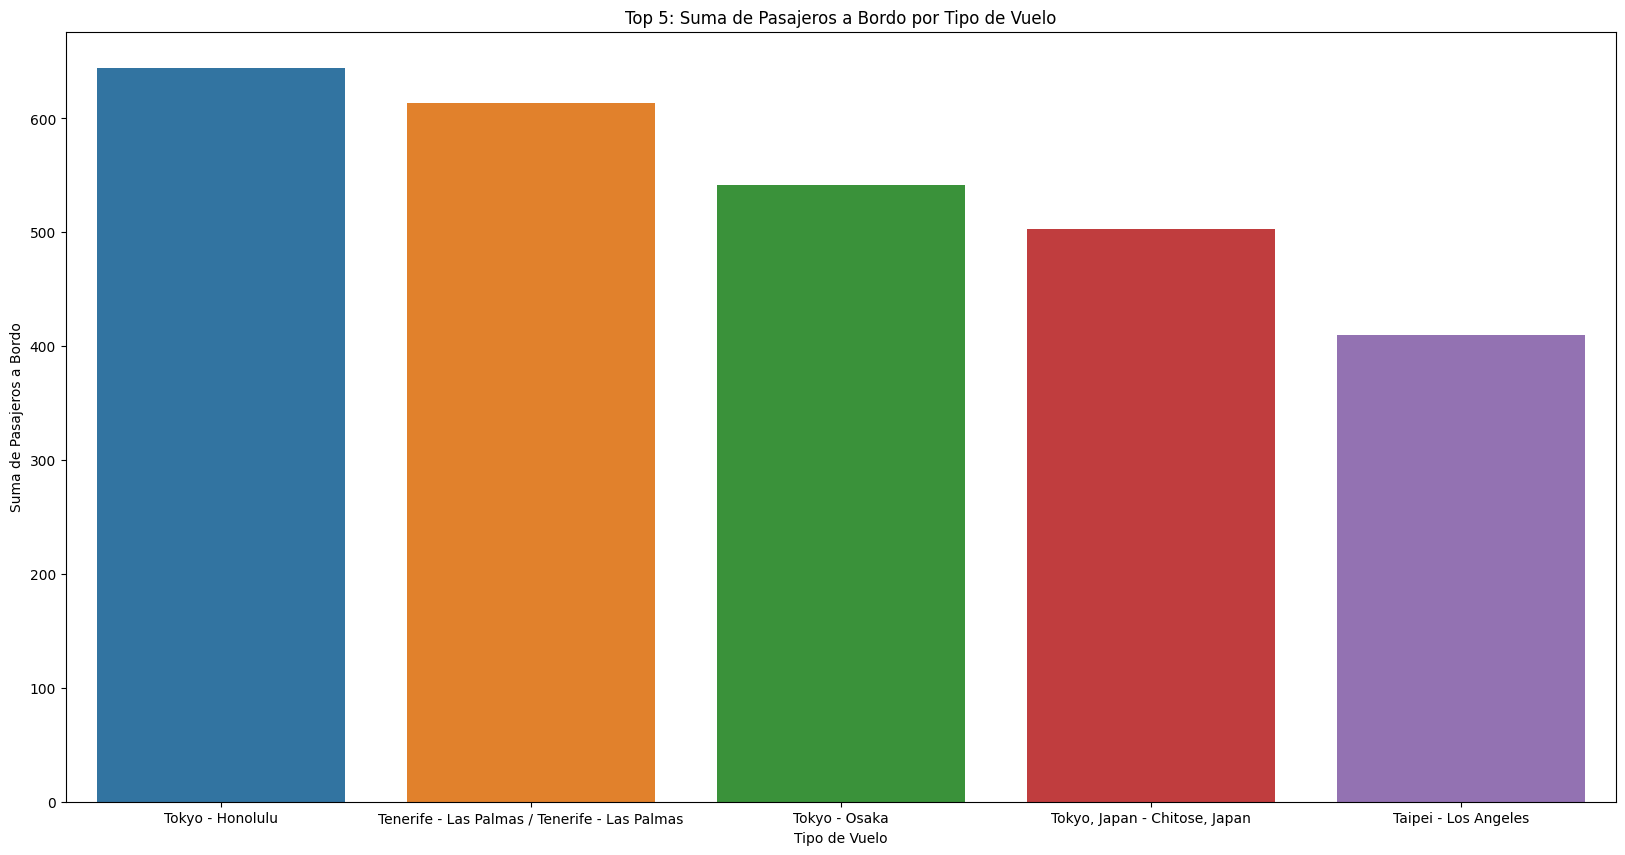

In [22]:
# Calcular la suma de 'Pasajeros a Bordo' agrupado por 'Tipo de Vuelo'
pasajeros_sum = df.groupby('flight_type')['passengers_onboard'].sum().reset_index()

# Ordenar los datos por la suma de 'Pasajeros a Bordo' de forma descendente
pasajeros_sum = pasajeros_sum.sort_values(by='passengers_onboard', ascending=False)

# Tomar solo los 10 primeros registros
top_10_pasajeros = pasajeros_sum.head(5)

# Crear el gráfico de barras
plt.figure(figsize=(20,10))
sns.barplot(x='flight_type', y='passengers_onboard', data=top_10_pasajeros)
plt.xlabel('Tipo de Vuelo')
plt.ylabel('Suma de Pasajeros a Bordo')
plt.title('Top 5: Suma de Pasajeros a Bordo por Tipo de Vuelo')
plt.show()

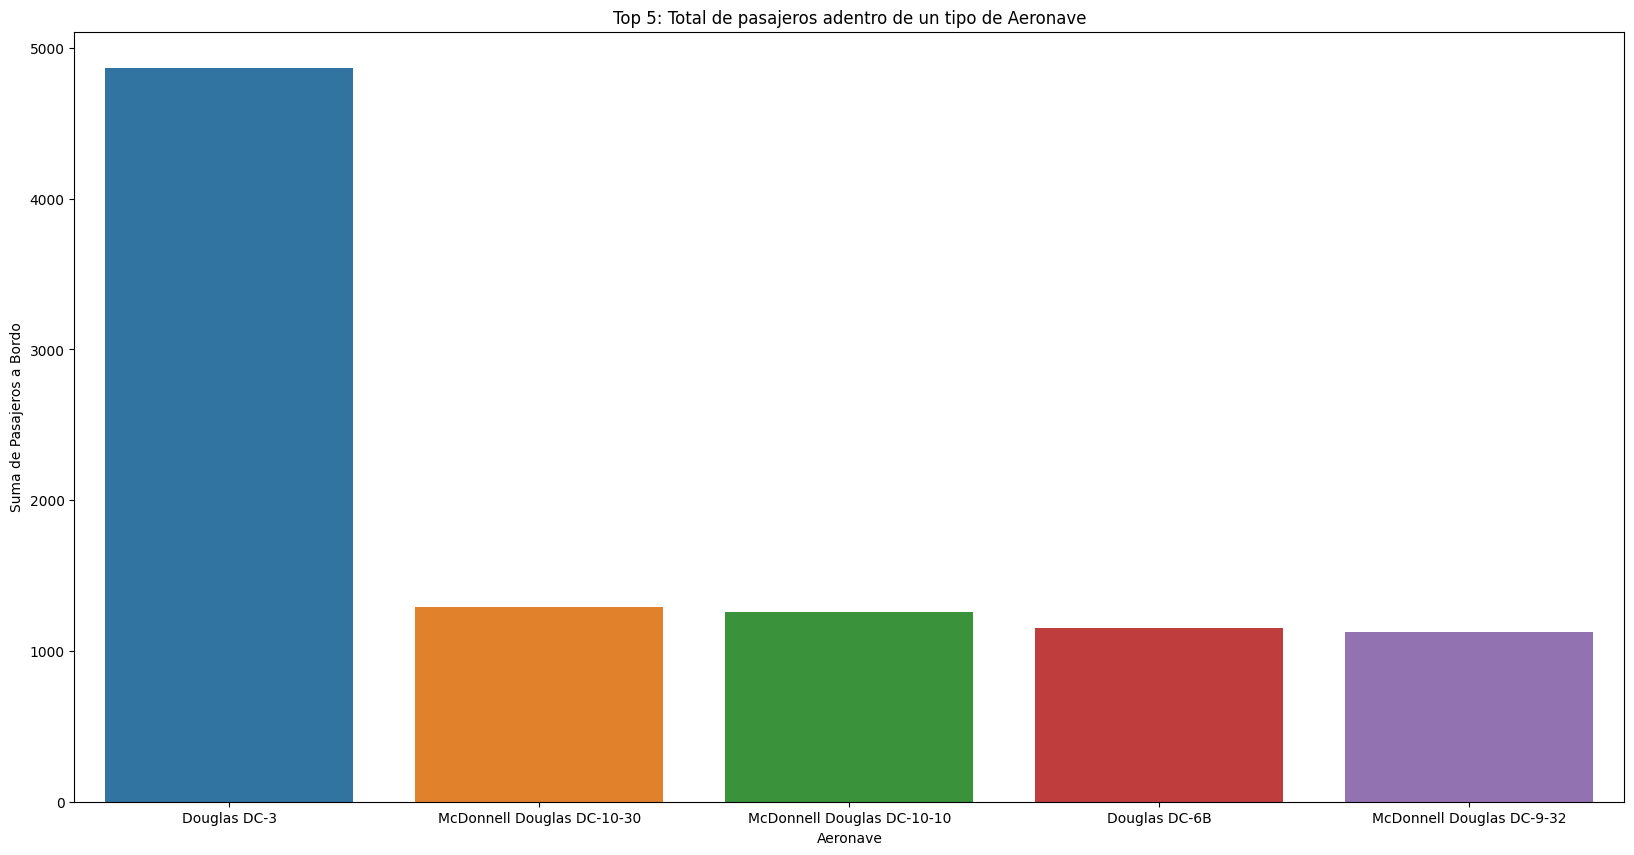

In [25]:
# Calcular la suma de 'Pasajeros a Bordo' agrupado
pasajeros_sum = df.groupby('aircraft_type')['passengers_onboard'].sum().reset_index()

# Ordenar los datos por la suma de 'Pasajeros a Bordo' de forma descendente
pasajeros_sum = pasajeros_sum.sort_values(by='passengers_onboard', ascending=False)

# Tomar solo los 10 primeros registros
top_10_pasajeros = pasajeros_sum.head(5)

# Crear el gráfico de barras
plt.figure(figsize=(20,10))
sns.barplot(x='aircraft_type', y='passengers_onboard', data=top_10_pasajeros)
plt.xlabel('Aeronave')
plt.ylabel('Suma de Pasajeros a Bordo')
plt.title('Top 5: Total de pasajeros adentro de un tipo de Aeronave')
plt.show()

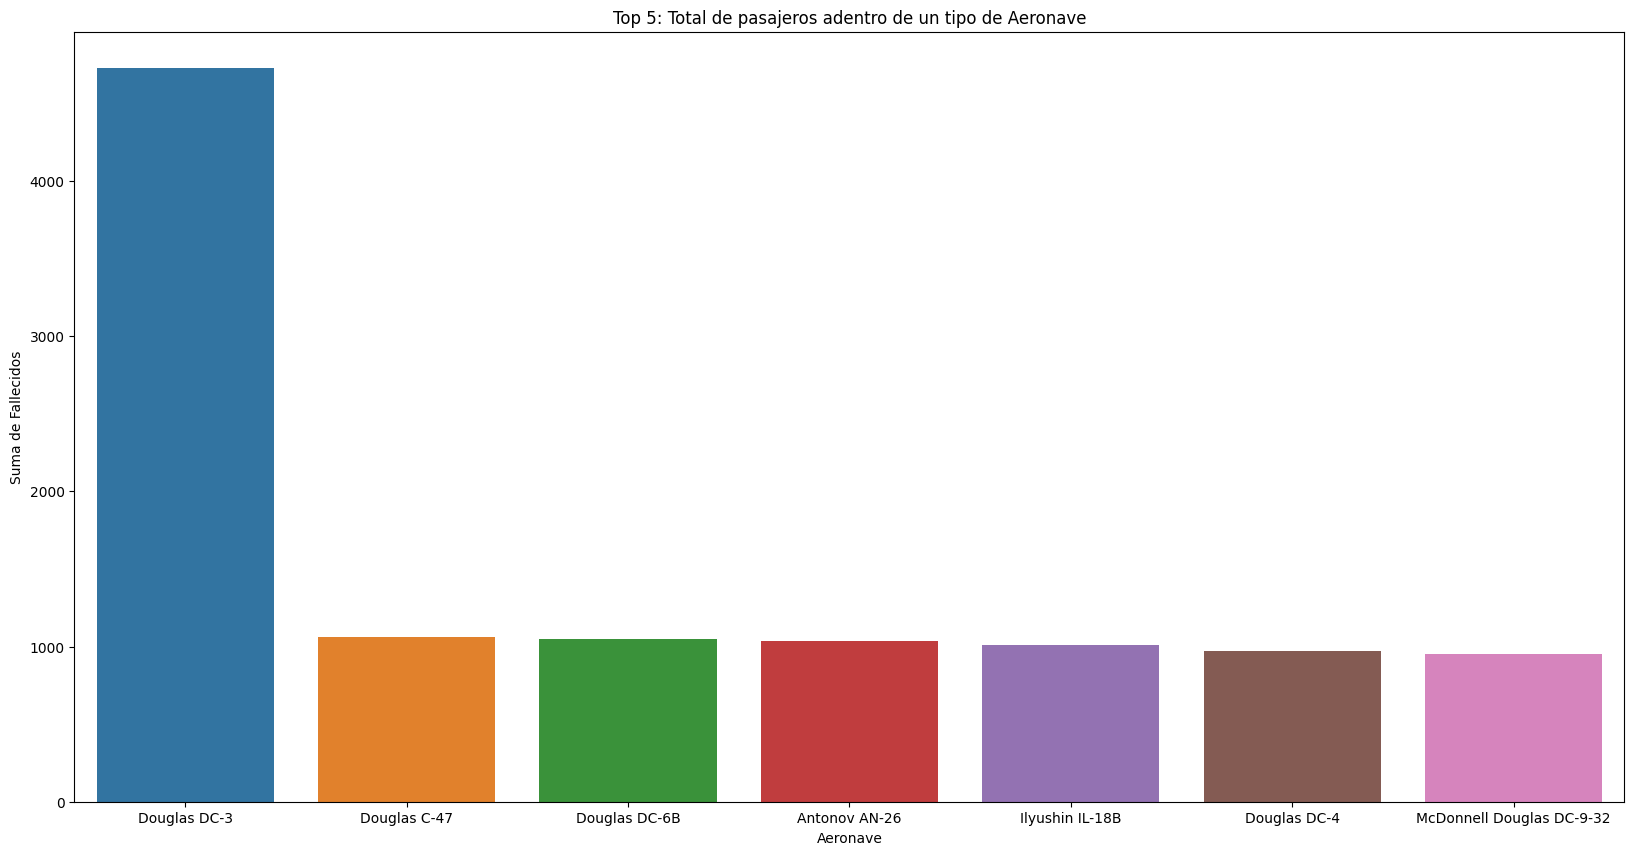

In [27]:
# Calcular la suma de 'Pasajeros a Bordo' agrupado
pasajeros_sum = df.groupby('aircraft_type')['total_fatalities'].sum().reset_index()

# Ordenar los datos por la suma de 'Pasajeros a Bordo' de forma descendente
pasajeros_sum = pasajeros_sum.sort_values(by='total_fatalities', ascending=False)

# Tomar solo los 10 primeros registros
top_10_pasajeros = pasajeros_sum.head(7)

# Crear el gráfico de barras
plt.figure(figsize=(20,10))
sns.barplot(x='aircraft_type', y='total_fatalities', data=top_10_pasajeros)
plt.xlabel('Aeronave')
plt.ylabel('Suma de Fallecidos')
plt.title('Top 5: Total de pasajeros adentro de un tipo de Aeronave')
plt.show()

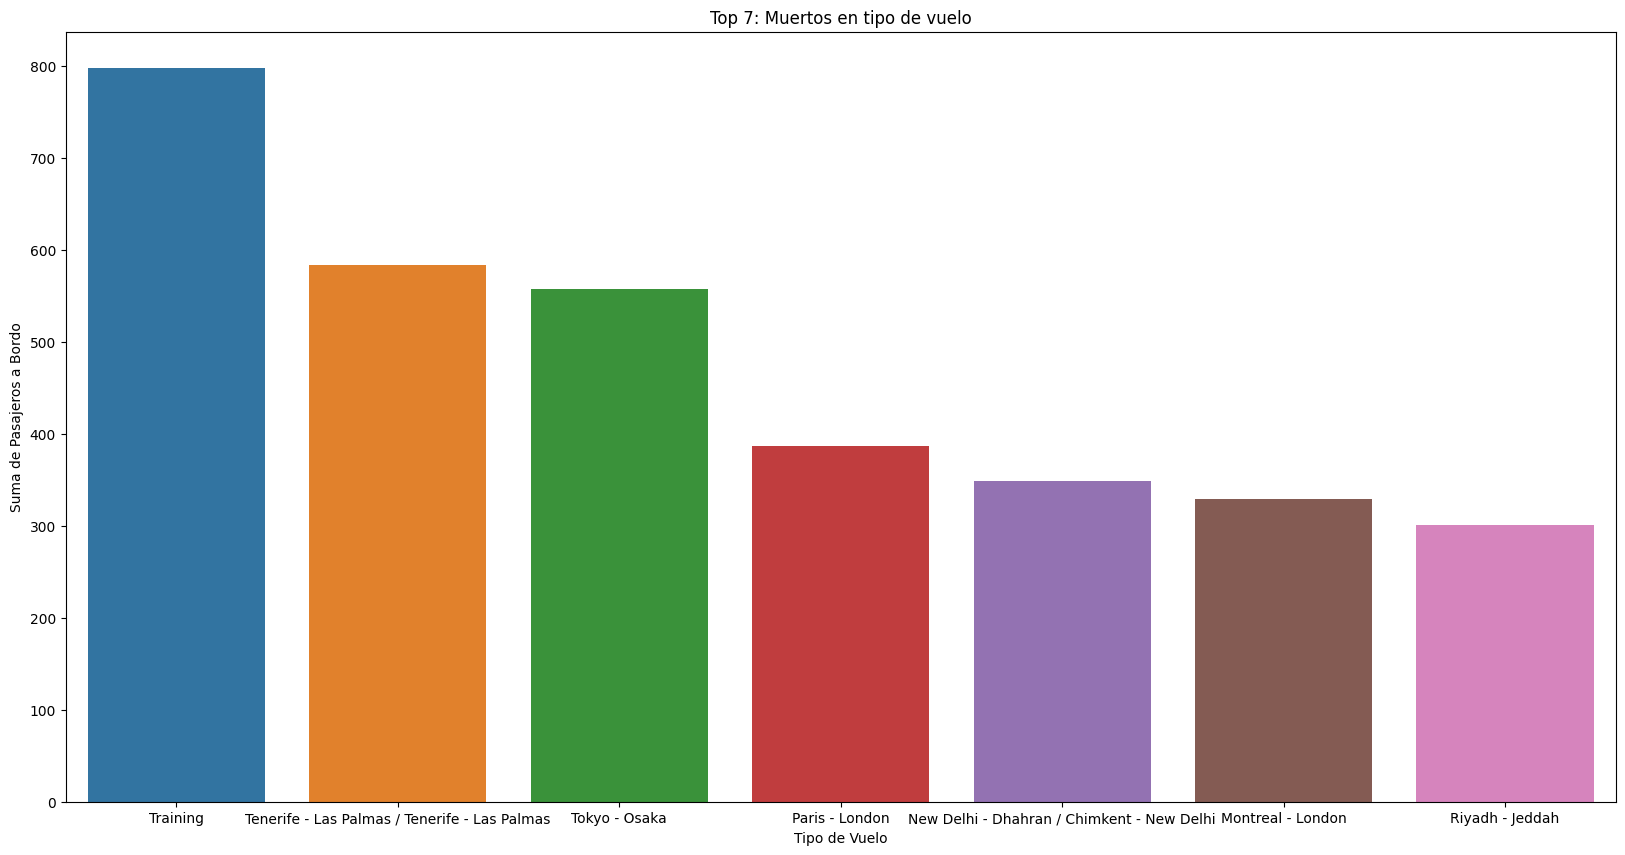

In [31]:
# Calcular la suma de 'Pasajeros a Bordo' agrupado por 'Tipo de Vuelo'
pasajeros_sum = df.groupby('flight_type')['total_fatalities'].sum().reset_index()

# Ordenar los datos por la suma de 'Pasajeros a Bordo' de forma descendente
pasajeros_sum = pasajeros_sum.sort_values(by='total_fatalities', ascending=False)

# Tomar solo los 10 primeros registros
top_7_pasajeros = pasajeros_sum.head(7)

# Crear el gráfico de barras
plt.figure(figsize=(20,10))
sns.barplot(x='flight_type', y='total_fatalities', data=top_7_pasajeros)
plt.xlabel('Tipo de Vuelo')
plt.ylabel('Suma de Pasajeros a Bordo')
plt.title('Top 7: Muertos en tipo de vuelo')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\W10-PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


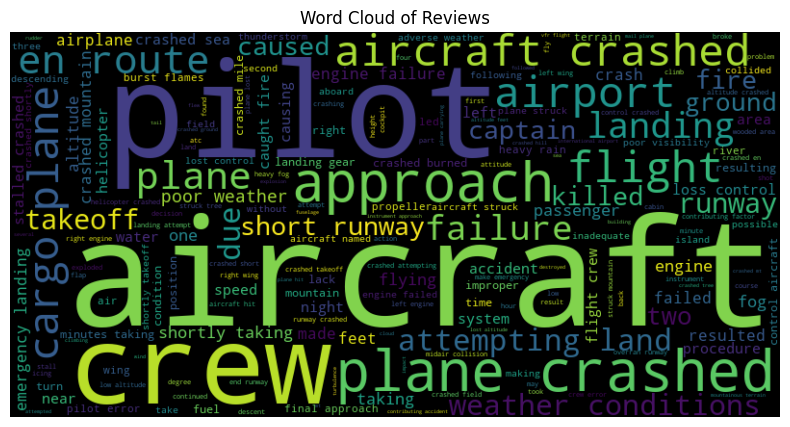

In [ ]:
import nltk
nltk.download('stopwords')
def preprocess_text(text):
    if pd.isnull(text):
        return ''
    stopwords = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stopwords]
    return ' '.join(tokens)
df['processed_review'] = df['summary'].apply(preprocess_text)
all_reviews = ' '.join(df['processed_review'])


wordcloud = WordCloud(width=800, height=400).generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()